# Electric Vehicle Presence Discovery

## EDA

In [1]:
#import packages
import datetime as dat
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import scipy.stats as stats
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [2]:
#load data
df = pd.read_csv('Data/averagehour.csv')
#view data
df.head()

,Unnamed: 0,dataid,use,building_type,city,pv,house_construction_year,total_square_footage,car1_y
0,0,59,1.752956,Single-Family Home,Austin,0,2011.0,3825.0,0
1,1,77,1.638684,Single-Family Home,Austin,1,2009.0,2669.0,0
2,2,86,1.495249,Single-Family Home,Austin,0,1948.0,1788.0,0
3,3,93,1.051423,Single-Family Home,Austin,1,1993.0,2934.0,0
4,4,94,0.691208,Single-Family Home,Austin,0,1975.0,1713.0,0


In [3]:
#drop the unamed column
df = df.drop(['Unnamed: 0'], axis=1)

### categorical Variables


In [4]:
city_counts = df['city'].value_counts()
city_counts
#lookat city

Austin       187
Boulder       16
Dallas         3
San Diego      2
Plano          2
Coppell        1
Humble         1
Houston        1
Grapevine      1
Name: city, dtype: int64

In [5]:
# recode to be Austin or other
df['city'] = np.where(df['city']=='Austin', 1, 0)
city_counts = df['city'].value_counts()
city_counts

1    187
0     27
Name: city, dtype: int64

In [6]:
#look at builiding type
building_type = df['building_type'].value_counts()
building_type

Single-Family Home    201
Town Home              11
Mobile Home             1
Apartment               1
Name: building_type, dtype: int64

In [7]:
#recode building_type
df['building_type'] = np.where(df['building_type']=='Single-Family Home', 1, 0)
building_counts = df['building_type'].value_counts()
building_counts

1    201
0     13
Name: building_type, dtype: int64

In [8]:
#Understand EV
df.groupby('car1_y').mean()

,dataid,use,building_type,city,pv,house_construction_year,total_square_footage
car1_y,,,,,,,
0,5167.928994,1.255491,0.946746,0.857988,0.573964,1989.668639,2191.050296
1,5295.800000,1.657467,0.911111,0.933333,0.888889,1994.777778,2475.233333


In [9]:
df.groupby('car1_y').dataid.nunique()

car1_y
0    169
1     45
Name: dataid, dtype: int64

In [10]:
#look at EV and PV
PV_EV = pd.crosstab(index=df["car1_y"],
                       columns=[df['pv']])

PV_EV


pv,0,1
car1_y,,
0,72,97
1,5,40


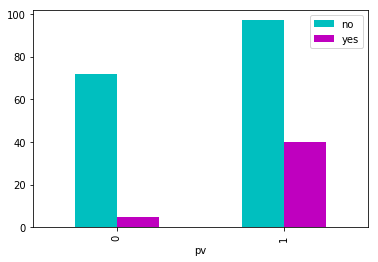

In [11]:
#create barchart to compare Survived with SEX
PV_EV.T.plot(kind='bar', color=['c','m'], grid=False)
plt.legend(['no','yes'])  

In [12]:
#look at percentages
round(PV_EV.transform(lambda x: x/x.sum()),2)

pv,0,1
car1_y,,
0,0.94,0.71
1,0.06,0.29


In [13]:
# building type and EV
buildingtype_EV = pd.crosstab(index=df["car1_y"],
                       columns=[df['building_type']])

buildingtype_EV

building_type,0,1
car1_y,,
0,9,160
1,4,41


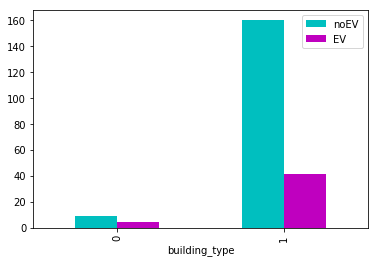

In [14]:
buildingtype_EV.T.plot(kind='bar', color=['c','m'], grid=False)
plt.legend(['noEV', 'EV'])

In [15]:
#look at percentages
round(buildingtype_EV.transform(lambda x: x/x.sum()),2)

building_type,0,1
car1_y,,
0,0.69,0.8
1,0.31,0.2


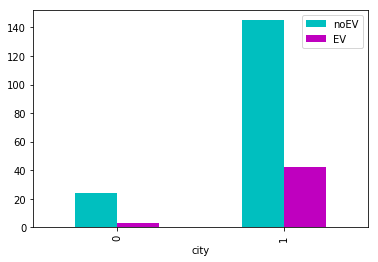

In [16]:
#location and eV
city_EV = pd.crosstab(index=df["car1_y"],
                       columns=[df['city']])
city_EV.T.plot(kind='bar', color=['c','m'], grid=False)
plt.legend(['noEV', 'EV'])

In [17]:
city_EV

city,0,1
car1_y,,
0,24,145
1,3,42


In [18]:
round(city_EV.transform(lambda x: x/x.sum()),2)


city,0,1
car1_y,,
0,0.89,0.78
1,0.11,0.22


### Continuous Features

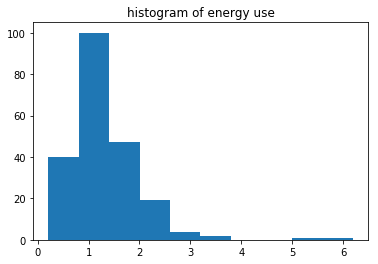

In [19]:
#look at enregy use
plt.hist(df['use'])
plt.title("histogram of energy use")
plt.show()

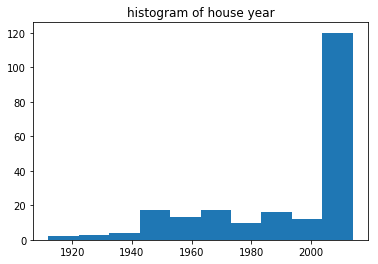

In [20]:
#look at house construction year
plt.hist(df['house_construction_year'])
plt.title("histogram of house year")
plt.show()

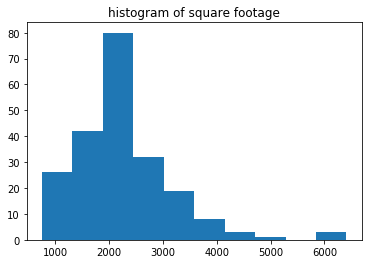

In [21]:
#look at total square footage
plt.hist(df['total_square_footage'])
plt.title("histogram of square footage")
plt.show()

#### plot EV with other variables to see how they relate

In [22]:
#plot EV with other features to see how they relate
groupbyEV =df.groupby('car1_y')

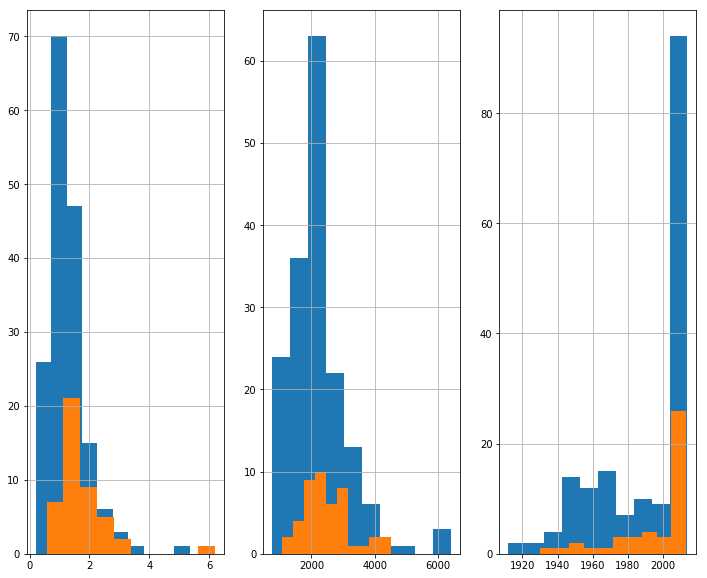

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,10))
for axis, col in zip(axes, ['use', 'total_square_footage', 'house_construction_year']):
    groupbyEV[col].hist(ax=axis)

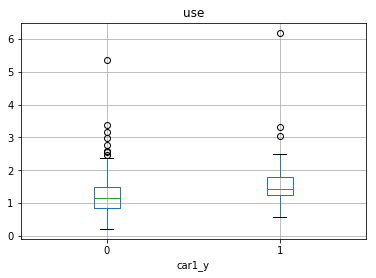

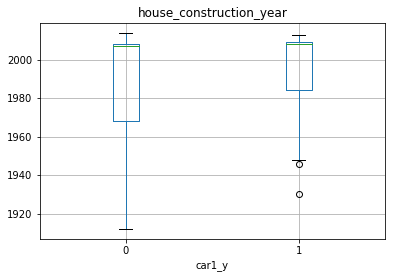

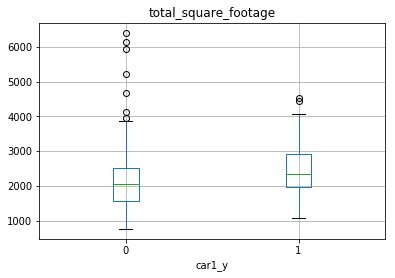

In [24]:
boxplotuse = df.boxplot(column=['use'], by = 'car1_y')
plt.suptitle("")
plt.show()
boxplotyear = df.boxplot(column=['house_construction_year'], by = 'car1_y')
plt.suptitle("")
plt.show()
boxplotsqfeet = df.boxplot(column=['total_square_footage'], by = 'car1_y')
plt.suptitle("")
plt.show()


### t test on energy use between ev and non ev homes

In [25]:
#create two dataframes for with and without EV
EV = df.loc[(df['car1_y']==1)]
NOEV = df.loc[(df['car1_y']==0)]

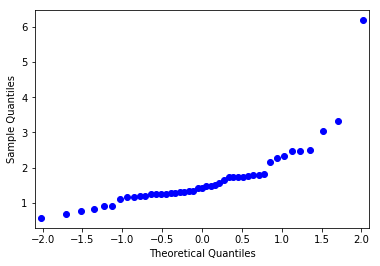

In [26]:
#use a qq plot to look for normality
import statsmodels.api as sm
fig = sm.qqplot(EV['use'])
plt.show()

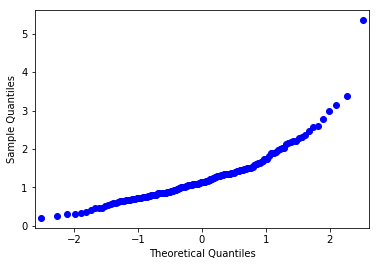

In [27]:
#use qq plot for normality on non EV enerygy use
fig = sm.qqplot(NOEV['use'])
plt.show()

In [28]:
#calcualte df for difference smaple sizes t test
import scipy as scipy
from scipy import stats
t2, p2 = stats.ttest_ind(EV['use'], NOEV['use'], equal_var=False)
print(t2, p2)

#The p-value is very small. We reject the null hypothesis. Homes with electric vehicles use more energy. 

2.7922847933801256 0.007123712930791133


In [29]:
#try removing outliers and see if plots look different
sorteduse = df.sort_values(by=['use'])
q1, q3 = np.percentile(sorteduse['use'], [25,75])
IQR = q3 - q1
lowerbound = q1 -(1.5*IQR)
upperbound = q3 +(1.5*IQR)
nooutlieruse = df.loc[(df['use']>lowerbound)&(df['use']<upperbound)]
nooutlieruse.shape

(205, 8)

In [30]:
#create two dataframes for with and without EV
EV = nooutlieruse.loc[(nooutlieruse['car1_y']==1)]
NOEV = nooutlieruse.loc[(nooutlieruse['car1_y']==0)]

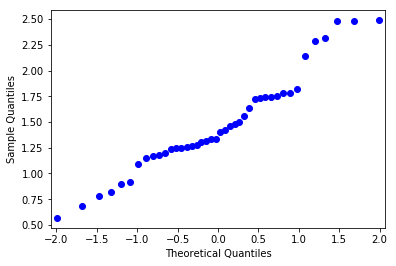

In [31]:
#use a qq plot to look for normality
import statsmodels.api as sm
fig = sm.qqplot(EV['use'])
plt.show()

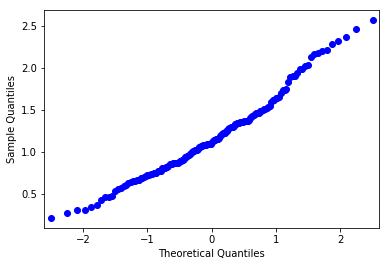

In [32]:
#use qq plot for normality on non EV enerygy use
fig = sm.qqplot(NOEV['use'])
plt.show()


In [33]:
import scipy as scipy
from scipy import stats
t2, p2 = stats.ttest_ind(EV['use'], NOEV['use'], equal_var=False)
print(t2, p2)

#The p-value is very small. We reject the null hypothesis. Homes with electric vehicles use more energy.

3.594083349469587 0.0006316145372417538


## Correlation

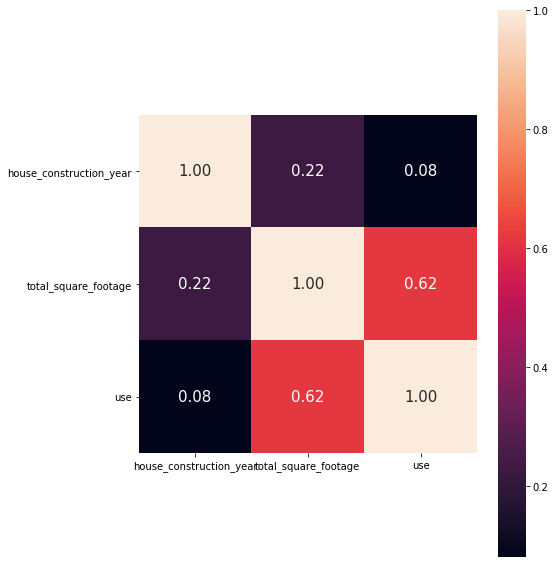

In [34]:
#correlation on original continous features
variables = ['house_construction_year','total_square_footage']
target = 'use'
cm = np.corrcoef(df[variables + [target]].T)
# Get heat map
plt.figure(figsize=(8,8))
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=variables + [target],
                 xticklabels=variables + [target])

# Show heat map
plt.tight_layout()
plt.show()

### train test split

In [35]:
# Specify the name of the target
target = 'car1_y'

# Get the target vector
y= df[target]

features = df.drop('dataid', axis=1)
# Specify the name of the features
features = list(features.drop(target,axis=1).columns)


# Get the feature vector
x= df[features]

In [36]:
from sklearn.model_selection import train_test_split

# Randomly choose 30% of the data for testing (using random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)

In [37]:
features

['use',
 'building_type',
 'city',
 'pv',
 'house_construction_year',
 'total_square_footage']

### oversampling

In [105]:
#oversampling
from imblearn import over_sampling, under_sampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy=4)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

ValueError: When 'sampling_strategy' is a float, it should be in the range (0, 1]. Got 4 instead.

In [104]:
import imblearn
imblearn.__version__

'0.4.3'

### standardize

In [39]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

# Standardize the training data
x_train_res = std_scaler.fit_transform(x_train_res)

# Standardize the testing data
X_test = std_scaler.transform(X_test)

C:\Users\Krystin\Anaconda3\envs\pecanpy-dev\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


### logistic regression model

In [40]:
import statsmodels.api as statsmodels

logit_model = statsmodels.Logit(y_train_res, x_train_res)

result = logit_model.fit()

print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.535040
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.228     
Dependent Variable: y                AIC:              264.5388  
Date:               2019-03-29 08:24 BIC:              285.3218  
No. Observations:   236              Log-Likelihood:   -126.27   
Df Model:           5                LL-Null:          -163.58   
Df Residuals:       230              LLR p-value:      1.1131e-14
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1     0.4958      0.2597     1.9091    0.0563    -0.0132     1.0049
x2    -0.5296      0.1859    -2.8494    0.0044    -0.8

### Feature Importance

In [41]:
# Delcare the model
rf = RandomForestClassifier(criterion='entropy',
            min_samples_leaf=2, min_samples_split=8,
                            n_estimators=40, n_jobs=1)

# Train the model
# use the fit method
result = rf.fit(x_train_res, y_train_res)


# Print the accuracy
print('Accuracy on train: ' + str(rf.score(X_train, y_train)), 'Accuracy on test: ' + str(rf.score(X_test, y_test)))

Accuracy on train: 0.6711409395973155 Accuracy on test: 0.6615384615384615


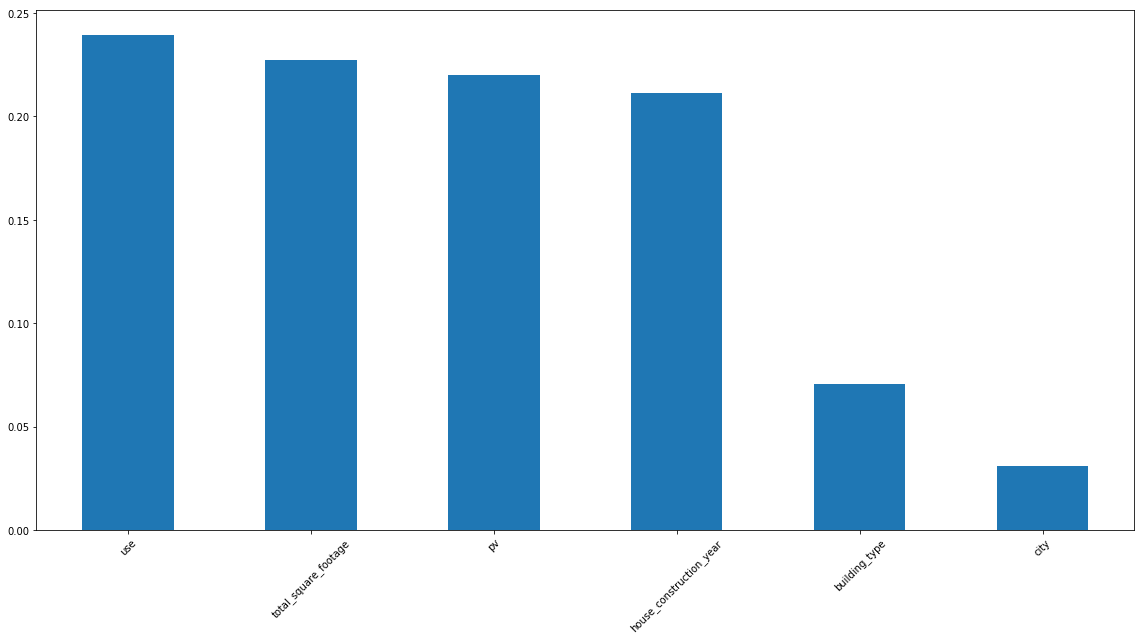

In [42]:

import matplotlib.pyplot as plt

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
# Implement me
f_importances = pd.Series(rf.feature_importances_, X_train.columns)

# Sort the array in descending order of the importances
# Implement me
f_importances = f_importances.sort_values(ascending=False)

# Draw the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

### feature engineering

In [68]:
# convert house construction year to age of home
df2 = df
df2['current_year'] = 2019
df2['age_of_house'] = df2['current_year'] - df2['house_construction_year']
df2 = df2.drop(['current_year', 'house_construction_year'], axis=1)
df2.head()

,dataid,use,building_type,city,pv,total_square_footage,car1_y,age_of_house
0,59,1.752956,1,1,0,3825.0,0,8.0
1,77,1.638684,1,1,1,2669.0,0,10.0
2,86,1.495249,1,1,0,1788.0,0,71.0
3,93,1.051423,1,1,1,2934.0,0,26.0
4,94,0.691208,1,1,0,1713.0,0,44.0


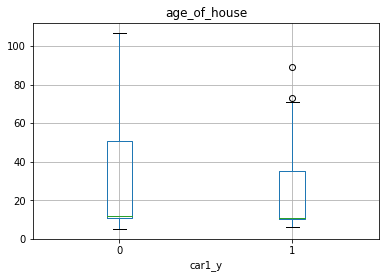

In [69]:
boxplotuse = df2.boxplot(column=['age_of_house'], by = 'car1_y')
plt.suptitle("")
plt.show()

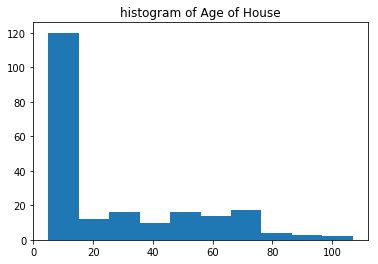

In [70]:
#histogram of age of house
plt.hist(df2['age_of_house'])
plt.title("histogram of Age of House")
plt.show()

In [71]:
#make use total for three years in stead of average hourly

#how many hours in 3 years
hoursinthreeyears = 24*365*3
df2['use'] = df2['use']*hoursinthreeyears
df2.head()

,dataid,use,building_type,city,pv,total_square_footage,car1_y,age_of_house
0,59,46067.678810,1,1,0,3825.0,0,8.0
1,77,43064.619488,1,1,1,2669.0,0,10.0
2,86,39295.153227,1,1,0,1788.0,0,71.0
3,93,27631.404293,1,1,1,2934.0,0,26.0
4,94,18164.954785,1,1,0,1713.0,0,44.0


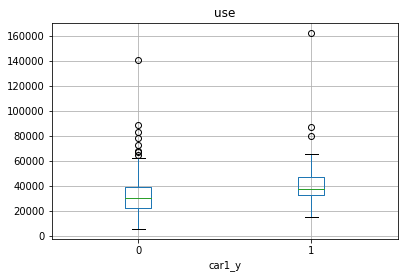

In [72]:
#check for normality wihtout outliers
boxplotuse = df2.boxplot(column=['use'], by = 'car1_y')
plt.suptitle("")
plt.show()

### t test for different in energy use by houses with and without EV

In [92]:
# first check for normality from boxplots
#get rid of outliers
#outliers for use
sorteduse = df2.sort_values(by=['use'])
q1, q3 = np.percentile(sorteduse['use'], [25,75])
IQR = q3 - q1
lowerbound = q1 -(1.5*IQR)
upperbound = q3 +(1.5*IQR)
df2 = df2.loc[(df2['use']>lowerbound)&(df2['use']<upperbound)]
df2.shape

(200, 9)

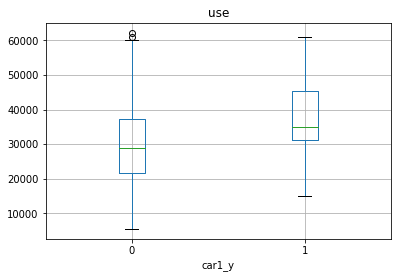

In [93]:
#check for normality wihtout outliers
boxplotuse = df2.boxplot(column=['use'], by = 'car1_y')
plt.suptitle("")
plt.show()

In [94]:
#create two dataframes for with and without EV
EV = df2.loc[(df2['car1_y']==1)]
NOEV = df2.loc[(df2['car1_y']==0)]

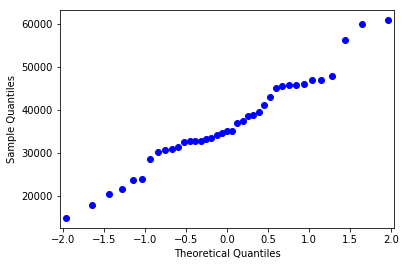

In [95]:
#use qq plot for normality on EV enerygy use
import statsmodels.api as sm
fig = sm.qqplot(EV['use'])
plt.show()

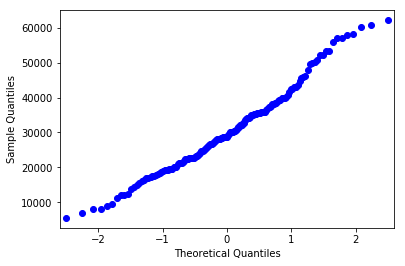

In [96]:
#use qq plot for normality on non EV enerygy use
fig = sm.qqplot(NOEV['use'])
plt.show()

In [97]:
#calcualte df for difference smaple sizes t test
import scipy as scipy
from scipy import stats
t2, p2 = stats.ttest_ind(EV['use'], NOEV['use'], equal_var=False)
print(t2, p2)

#The p-value is very small. We reject the null hypothesis. Homes with electric vehicles use more energy. 

3.2134282629049014 0.0020466070952163836


### Correlation

In [79]:
#run a correlation on continuous variables

# Get correlation matrix, where each entry is the Pearson product-moment correlation coefficients
variables = ['age_of_house','total_square_footage']
target = 'use'
cm = np.corrcoef(df2[variables + [target]].T)

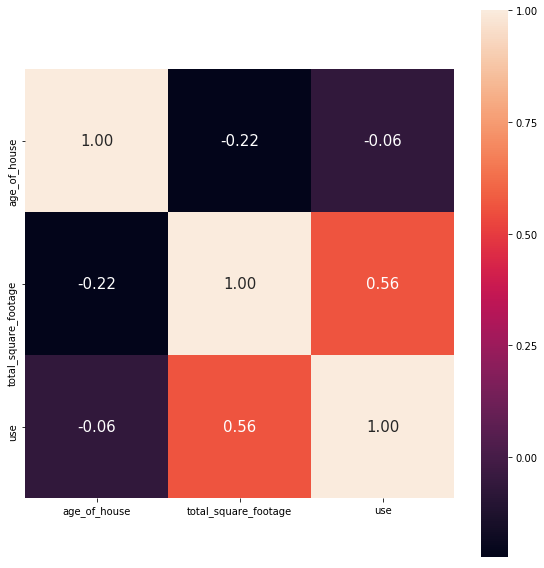

In [80]:
# Get heat map
plt.figure(figsize=(8,8))
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=variables + [target],
                 xticklabels=variables + [target])

# Show heat map
plt.tight_layout()
plt.show()

## Logistic Regression and Random Forest on featured Engineering dataframe

In [81]:
#run test on featured engineered variables
# Specify the name of the target
target = 'car1_y'

# Get the target vector
y= df2[target]

features = df2.drop('dataid', axis=1)
# Specify the name of the features
features = list(features.drop(target,axis=1).columns)


# Get the feature vector
x= df2[features]
from sklearn.model_selection import train_test_split

# Randomly choose 30% of the data for testing (using random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)

features
#oversampling
sm = SMOTE(random_state=12, ratio =1.0)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

#standardize
std_scaler = StandardScaler()

# Standardize the training data
x_train_res = std_scaler.fit_transform(x_train_res)

# Standardize the testing data
X_test = std_scaler.transform(X_test)

#logistic regression model
logit_model = statsmodels.Logit(y_train_res, x_train_res)

result = logit_model.fit()

print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.537111
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.225     
Dependent Variable: y                AIC:              256.9224  
Date:               2019-03-29 08:36 BIC:              277.4985  
No. Observations:   228              Log-Likelihood:   -122.46   
Df Model:           5                LL-Null:          -158.04   
Df Residuals:       222              LLR p-value:      5.8975e-14
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1     0.5638      0.2250     2.5052    0.0122     0.1227     1.0048
x2    -0.5998      0.1947    -3.0800    0.0021    -0.9

C:\Users\Krystin\Anaconda3\envs\pecanpy-dev\lib\site-packages\ipykernel_launcher.py:32: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.


In [82]:
#random forest feature importance
# Delcare the model
rf = RandomForestClassifier(criterion='entropy',
            min_samples_leaf=2, min_samples_split=8,
                            n_estimators=40, n_jobs=1)

# Train the model
# use the fit method
result = rf.fit(x_train_res, y_train_res)


# Print the accuracy
print('Accuracy on train: ' + str(rf.score(X_train, y_train)), 'Accuracy on test: ' + str(rf.score(X_test, y_test)))

Accuracy on train: 0.7972027972027972 Accuracy on test: 0.7258064516129032


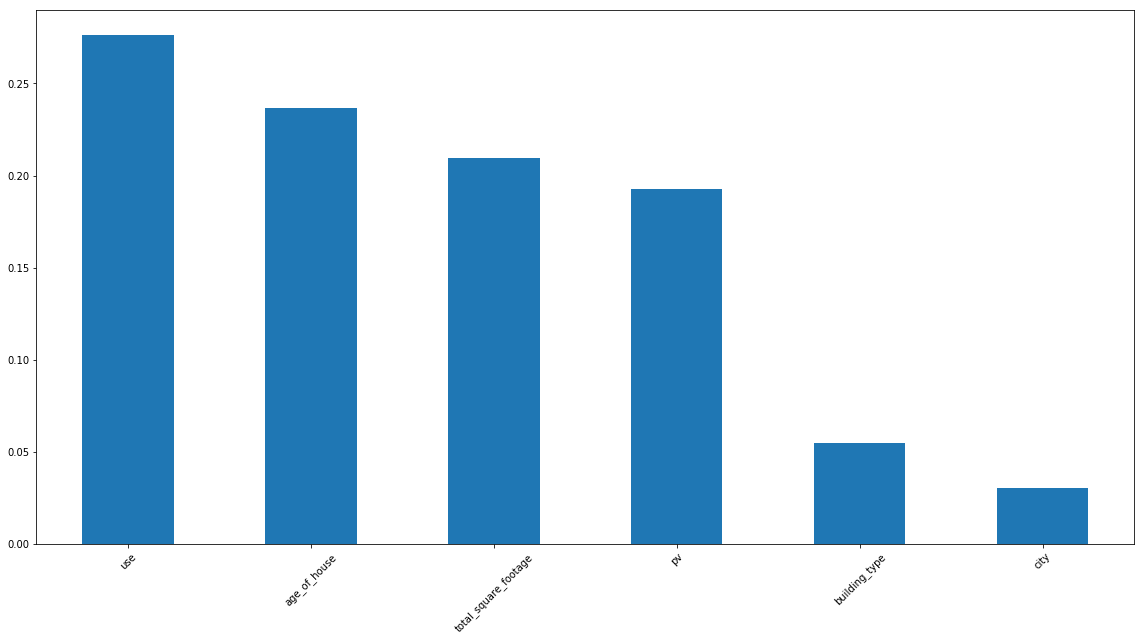

In [83]:
# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
# Implement me
f_importances = pd.Series(rf.feature_importances_, X_train.columns)

# Sort the array in descending order of the importances
# Implement me
f_importances = f_importances.sort_values(ascending=False)

# Draw the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

## Feature Engineering 
### Let's try use/square feet

In [84]:
df3 = df2
df3['use/sqft'] = df3['use'] / df3['total_square_footage']
df3 = df3.drop(['use', 'total_square_footage'], axis=1)
df3.head()

,dataid,building_type,city,pv,car1_y,age_of_house,use/sqft
0,59,1,1,0,0,8.0,12.043838
1,77,1,1,1,0,10.0,16.135114
2,86,1,1,0,0,71.0,21.977155
3,93,1,1,1,0,26.0,9.417657
4,94,1,1,0,0,44.0,10.604177


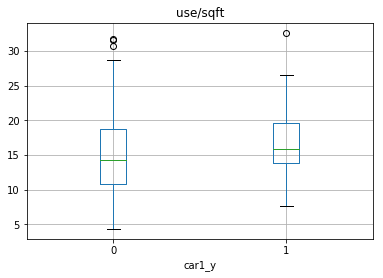

In [85]:
boxplotuse = df3.boxplot(column=['use/sqft'], by = 'car1_y')
plt.suptitle("")
plt.show()

## T test for difference in house Energy/sq ft use for EV and no EV

In [ ]:
# first check for normality from boxplots
#get rid of outliers
#outliers for use
sorteduse = df3.sort_values(by=['use/sqft'])
q1, q3 = np.percentile(sorteduse['use/sqft'], [25,75])
IQR = q3 - q1
lowerbound = q1 -(1.5*IQR)
upperbound = q3 +(1.5*IQR)
df3 = df3.loc[(df3['use/sqft']>lowerbound)&(df3['use/sqft']<upperbound)]
df3.shape

In [86]:
# based on box plot above use/sqft appears to be relatilvey normal iwthout outliers based on boxplot
#create two dataframes for with and without EV
EV = df3.loc[(df3['car1_y']==1)]
NOEV = df3.loc[(df3['car1_y']==0)]

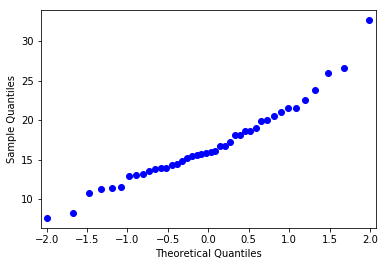

In [88]:
#use qq plot for normality on EV enerygy use
import statsmodels.api as sm
fig = sm.qqplot(EV['use/sqft'])
plt.show()

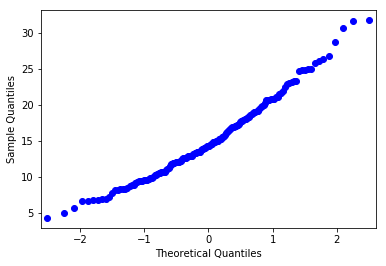

In [89]:
#use qq plot for normality on non EV enerygy use
fig = sm.qqplot(NOEV['use/sqft'])
plt.show()

In [91]:
#calcualte df for difference smaple sizes t test
import scipy as scipy
from scipy import stats
t2, p2 = stats.ttest_ind(EV['use/sqft'], NOEV['use/sqft'], equal_var=False)
print(t2, p2)

#The p-value is not very small. We do not reject the null hypothesis. There is no difference between houses with and without EV based ontheir eneryg use per square foot. 

1.9330525953087327 0.05723993116152714


## ODDS Ratio

In [98]:
#look at EV and PV
PV_EV = pd.crosstab(index=df["car1_y"],
                       columns=[df['pv']])

PV_EV


pv,0,1
car1_y,,
0,72,97
1,5,40


In [102]:
ODDS = (PV_EV.iloc[0,0]*PV_EV.iloc[1,1]) / (PV_EV.iloc[0,1]*PV_EV.iloc[1,0])

ODDS

#The odds of having an electric vehicle among those with PV are 5.93 times the odds of having an electric vehicle among those without PV. 

5.938144329896907